<a href="https://colab.research.google.com/github/Bnguy0926/BrainTumorMRIDectectionAI/blob/main/ECS170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Libraries and Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [ ]:
os.chdir("/content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection")

In [ ]:
df = pd.read_csv('DATASETS/bt_dataset_t3.csv')

In [ ]:
df.columns

Index(['Image', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE',
       'DC', 'Target'],
      dtype='object')

In [ ]:
data_scan = df.drop(['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE',
       'DC'],axis = 1)

In [ ]:
print(data_scan)

          Image  Target
0        Image1       1
1        Image2       1
2        Image3       1
3        Image4       0
4        Image5       0
...         ...     ...
1639  Image1640       0
1640  Image1641       0
1641  Image1642       0
1642  Image1643       0
1643  Image1644       0

[1644 rows x 2 columns]


In [ ]:
images_data = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection/Brain_Tumor',labels=None)

Found 3782 files belonging to 1 classes.


# Data Processing

In [ ]:
drive_folder_path = '//content/drive/Shareddrives/ECS 170: Brain_Tumor_Detection/Brain_Tumor'

image_arrays = []

for filename in os.listdir(drive_folder_path):
    if filename.endswith(".jpg"):  # Adjust the file extension as needed
        image_path = os.path.join(drive_folder_path, filename)
        image = Image.open(image_path)
        temp = image.resize((200,200))

        np_array = np.array(temp)
        grayscale_image = cv2.cvtColor(np_array, cv2.COLOR_RGB2GRAY)


        image_arrays.append(grayscale_image/255)

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(image_arrays[0])

In [ ]:
'''for f in image_arrays[f]:
    for num in image'''

print(image_arrays[10][100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01176471 0.01568627
 0.00392157 0.17254902 0.24313725 0.29019608 0.69019608 0.90980392
 0.89019608 0.89019608 0.88235294 0.8745098  0.86666667 0.85490196
 0.85098039 0.82352941 0.77254902 0.70196078 0.68235294 0.74901961
 0.82745098 0.85490196 0.83921569 0.84313725 0.88235294 0.9254902
 0.91764706 0.87843137 0.87058824 0.8745098  0.8745098  0.88627451
 0.9254902  0.96078431 0.9372549  0.91764706 0.91372549 0.90196078
 0.88235294 0.89019608 0.91372549 0.94509804 0.79607843 0.51372549
 0.26666667 0.25490196 0.29803922 0.37647059 0.14901

In [ ]:
type(image_array)

numpy.ndarray

In [ ]:
print(image_arrays[0].shape)

(200, 200)


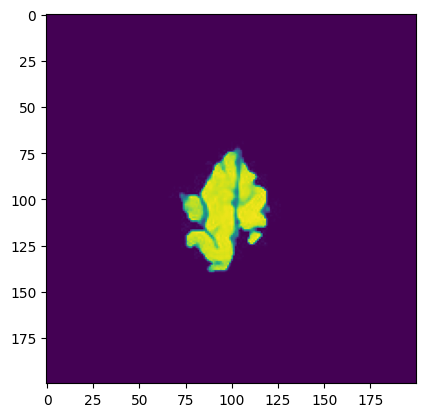

In [ ]:
img_plot = plt.imshow(image_arrays[40])
plt.show()

In [ ]:
print(image_arrays[0].shape)

(200, 200)
